# Section 1: Setting Up the Environment

In [2]:
import numpy as np  # Importing NumPy for numerical operations and array handling
import pandas as pd  # Importing Pandas for data manipulation and analysis
import re  # Importing Regular Expressions for text processing and cleaning
import nltk  # Importing Natural Language Toolkit for NLP-related tasks
import spacy  # Importing SpaCy for advanced NLP tasks like Named Entity Recognition
import string  # Importing string operations for handling punctuation and text processing
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from PIL import Image
# Suppress SettingWithCopyWarning in Pandas to avoid unnecessary warnings during data manipulation
pd.options.mode.chained_assignment = None


# Section 2: Data Collection

In [3]:

# Load the dataset into a Pandas DataFrame
# - Reads the 10000 rows of the CSV file to reduce memory usage and focus on a manageable subset.
full_df = pd.read_csv("/kaggle/input/twitter-dataset/twitter_dataset.csv")

# Select only the 'Text' column for further processing
# - This column contains the tweet content, which is the primary focus for analysis.
df = full_df[["Text"]]

# Ensure the 'Text' column is treated as string data
# - This step avoids any potential type mismatches or errors during text processing.
df["text"] = df["Text"].astype(str)

# Display the first few rows of the dataset to confirm successful loading and structure
# - Verifies that the data has been read correctly and provides a preview of the dataset's format.
full_df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


# Section 3: Preprocessing Steps
- Lowercasing
- Removal of Punctuations
- Removal of Stopwords
- Removal of Frequent Words
- Removal of Rare Words
- Stemming
- Lemmatization
- Removal of Emojis
- Removal of Emoticons
- Conversion of Emoticons to Words
- Conversion of Emojis to Words
- Removal of URLs
- Removal of HTML Tags
- Chat Words Conversion
- Spelling Correction

These preprocessing steps will help us clean and structure the raw tweet data for better analysis. However, we need to carefully select which steps to apply, as unnecessary preprocessing can remove valuable information.

For example:
- In our **sentiment analysis**, emojis and emoticons may provide significant sentiment cues, so we need to retain them in the data.
- For general **trend analysis**, we might focus on cleaning unnecessary noise like URLs and special characters while preserving the hashtags and mentions.


## Lowercasing

Lowercasing is a fundamental text preprocessing technique. It involves converting all characters in the text to lowercase, ensuring that variations like "text," "Text," and "TEXT" are treated as the same word.

This step is particularly useful for tasks such as frequency analysis and TF-IDF vectorization, where consistent casing helps consolidate identical words, leading to more accurate counts or TF-IDF values. By normalizing text, we reduce redundancy and simplify downstream analysis.

However, lowercasing may not always be beneficial. For example:
- In **Part-of-Speech (POS) tagging**, proper casing can provide crucial hints about nouns, proper nouns, and other grammatical elements.
- For **sentiment analysis**, uppercase words might indicate emphasis or emotion, such as anger or excitement, and removing this distinction could reduce the quality of insights.

Modern text vectorizers and tokenizers, such as [sklearn's TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [Keras Tokenizer](https://keras.io/preprocessing/text/), often perform lowercasing automatically. It's essential to carefully consider whether to disable this behavior based on the specific requirements of our analysis.

In this project, lowercasing will be applied to standardize the tweet text for trend and sentiment analysis, ensuring consistency across all entries while preserving meaningful patterns.


In [4]:
df["text_lower"] = df["text"].str.lower()
df.head()


,Text,text,text_lower
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,party least receive say or single. prevent pre...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,hotel still congress may member staff. media d...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,nice be her debate industry that year. film wh...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,laugh explain situation career occur serious. ...
4,Involve sense former often approach government...,Involve sense former often approach government...,involve sense former often approach government...


## Removal of Punctuations

Removing punctuation is another essential text preprocessing step. It standardizes the text by eliminating symbols that typically do not carry significant meaning in most analysis contexts. For example, this ensures that "hurray" and "hurray!" are treated as identical, avoiding redundancy in data representation.

However, the list of punctuation marks to remove should be carefully selected based on the project's objectives. For instance, Python's `string.punctuation` provides a comprehensive list of common punctuation symbols:

`!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~`

In some cases, retaining specific punctuation marks (e.g., hashtags `#` and mentions `@` in Twitter data) might be crucial for extracting trends or user interaction patterns. Conversely, removing all punctuation may simplify text for tasks like frequency analysis or machine learning models.

For our project, we will focus on removing unnecessary punctuation while preserving key symbols such as hashtags and mentions that provide valuable context for sentiment and trend analysis. This tailored approach ensures that the text remains both clean and informative.


In [5]:
# drop the new column created in last cell
df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,Text,text,text_wo_punct
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single Prevent prev...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff Media dr...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year Film whe...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious F...
4,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...


## Removal of Stopwords

Stopwords are frequently occurring words in a language such as "the," "a," and "is," that typically do not carry significant meaning for most text analysis tasks. Removing stopwords is a common preprocessing step because they tend to add noise to the data, which can skew results in tasks like frequency analysis or machine learning.

However, in some cases, stopwords may still hold importance. For example, in tasks like **Part-of-Speech (POS) tagging**, these words provide essential clues about the syntactic structure of a sentence and cannot be discarded without losing critical context.

Precompiled stopword lists for various languages are available and can be safely used in most cases. For instance, the **English stopword list** from the `nltk` package contains common words such as:

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', ... ]


For our project, stopwords will be removed to help us focus on the more meaningful words in tweets, such as hashtags, mentions, and keywords, which provide more insight into trends and sentiments. However, careful consideration will be given to tasks where retaining certain stopwords may be valuable, such as in specific sentiment nuances.


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [8]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,Text,text,text_wo_punct,text_wo_stop
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single Prevent prev...,Party least receive say single Prevent prevent...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff Media dr...,Hotel still Congress may member staff Media dr...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year Film whe...,Nice debate industry year Film generation push...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious F...,Laugh explain situation career occur serious F...
4,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...


## Removal of Frequent Words

In the previous preprocessing step, we removed stopwords based on general language information. However, when working with a domain-specific corpus (like Twitter data in this case), there may be other words that appear frequently but do not provide significant value for our analysis. These words, although common within the dataset, might not contribute to the insights we're aiming to derive.

This step involves identifying and removing these frequent words to ensure that our analysis focuses on more meaningful terms. In some cases, techniques like **TF-IDF (Term Frequency-Inverse Document Frequency)** can automatically down-weight the impact of frequent words. This is because TF-IDF assigns lower importance to words that appear frequently across many documents, while emphasizing those that are rarer and more informative.

To identify frequent words, we can compute the word frequency distribution and remove those that occur too often in the dataset. For our project, we will first identify the most common words in the tweets and then remove them in the next step to improve the focus of our analysis on relevant keywords, trends, and sentiments.


In [9]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('Mrs', 346),
 ('American', 346),
 ('tax', 344),
 ('Democrat', 343),
 ('hard', 343),
 ('maybe', 339),
 ('Mr', 338),
 ('I', 337),
 ('Republican', 336),
 ('Congress', 335)]

In [10]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,Text,text,text_wo_punct,text_wo_stop,text_wo_stopfreq
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single Prevent prev...,Party least receive say single Prevent prevent...,Party least receive say single Prevent prevent...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff Media dr...,Hotel still Congress may member staff Media dr...,Hotel still may member staff Media draw buy fl...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year Film whe...,Nice debate industry year Film generation push...,Nice debate industry year Film generation push...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious F...,Laugh explain situation career occur serious F...,Laugh explain situation career occur serious F...
4,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...


## Removal of Rare Words

The concept of removing rare words is similar to the previous step, but instead of eliminating frequent words, we focus on removing words that appear very infrequently in the dataset.

Rare words may not contribute meaningfully to the analysis, especially when analyzing trends, sentiment, or user interactions in a large corpus like Twitter data. These words may not provide sufficient context or may be too specific to individual tweets, making them less valuable for broader insights.

By removing rare words, we can reduce noise and simplify the dataset, allowing the model or analysis to focus on more common and relevant terms. In this step, we will identify words that occur only a few times across the entire dataset and remove them, ensuring that the analysis centers around more impactful and frequently occurring terms.

For our project, this process helps in cleaning up the dataset, ensuring that we don't waste resources analyzing words that aren't likely to add any valuable insights about trends, hashtags, or sentiment in Twitter data.


In [11]:
# Drop the two columns which are no more needed
df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()

,Text,text,text_wo_stopfreq,text_wo_stopfreqrare
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say single Prevent prevent...,Party least receive say single Prevent prevent...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still may member staff Media draw buy fl...,Hotel still may member staff Media draw buy fl...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice debate industry year Film generation push...,Nice debate industry year Film generation push...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious F...,Laugh explain situation career occur serious F...
4,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...


## Combining Stopwords, Frequent Words, and Rare Words

To streamline the text preprocessing process, we can combine all the words we want to remove—**stopwords**, **frequent words**, and **rare words**—into a single list. This will allow us to clean the dataset more efficiently by removing all unwanted words in one step, reducing redundancy in the process.

By creating a comprehensive list of words to exclude, we ensure that our analysis is based on meaningful and relevant terms, eliminating noise that could affect our results. This approach is especially useful in handling large datasets, like Twitter data, where there may be an abundance of irrelevant words that do not contribute to sentiment analysis, hashtag trends, or user interactions.

The combined list of words can be used to filter out unnecessary data, leading to a cleaner, more focused dataset that enhances the accuracy of our analysis.

---

## Stemming

Stemming is a crucial text preprocessing technique in which words are reduced to their base or root form. For instance, words like **"walks"** and **"walking"** are reduced to **"walk"**. While stemming helps in standardizing words, it may sometimes result in non-dictionary terms, as seen in examples like **"console"** and **"consoling"**, which would both become **"consol"**, a non-standard word.

There are several algorithms for stemming, and one of the most popular is the **Porter Stemmer**, which is widely used for its efficiency. While stemming helps in reducing the complexity of the vocabulary and can improve the performance of models or analysis, it’s important to be aware that it may lose some nuances in word meanings.

In our project, we'll use the **NLTK package** to apply stemming to our Twitter dataset. This process will help in reducing variations of words, allowing us to focus on the core concepts in the tweets without being concerned about different word forms.


In [12]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns
df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True)

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df.head()

,Text,text,text_stemmed
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,parti least receiv say or single. prevent prev...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,hotel still congress may member staff. media d...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,nice be her debat industri that year. film whe...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,laugh explain situat career occur serious. fiv...
4,Involve sense former often approach government...,Involve sense former often approach government...,involv sens former often approach government. ...


Also this porter stemmer is for English language. If we are working with other languages, we can use snowball stemmer. The supported languages for snowball stemmer are

In [13]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

## Lemmatization

Lemmatization is a crucial text preprocessing step that reduces inflected words to their base or root form, known as the **lemma**. Unlike stemming, which simply chops off word suffixes, lemmatization ensures that the root word is a valid word in the language. For example, the word **"better"** is lemmatized to **"good"**, which is a valid word in English.

Lemmatization generally produces more linguistically accurate results compared to stemming. However, it tends to be slower, as it involves checking the word's dictionary form and considering the word’s context to ensure it makes sense. Because of this, the choice between stemming and lemmatization depends on the specific requirements of the task, such as whether linguistic correctness or processing speed is more important.

In our Twitter data analysis project, we will leverage **spaCy**, a fast and efficient NLP library, to perform lemmatization. spaCy not only provides accurate lemmatization but also handles tokenization and part-of-speech tagging automatically. This allows us to accurately lemmatize words like **"running"**, **"ran"**, and **"runner"** into **"run"**, while ensuring proper context is maintained.

Using **spaCy's** lemmatization will help us standardize variations of words and maintain the meaning of the text, which is especially important in our project where understanding the context and sentiment of tweets is crucial for accurate analysis.


In [14]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize words using spaCy
def lemmatize_words_spacy(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Apply lemmatization on the text column using spaCy
df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words_spacy(text))

# Display the first few rows
df.head()


,Text,text,text_stemmed,text_lemmatized
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,parti least receiv say or single. prevent prev...,Party least receive say or single . prevent pr...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,hotel still congress may member staff. media d...,Hotel still Congress may member staff . medium...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,nice be her debat industri that year. film whe...,nice be her debate industry that year . film w...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,laugh explain situat career occur serious. fiv...,Laugh explain situation career occur serious ....
4,Involve sense former often approach government...,Involve sense former often approach government...,involv sens former often approach government. ...,involve sense former often approach government...


## Removal of Emojis

Emojis have become a significant part of communication on social media platforms, conveying emotions, reactions, or additional context to the text. While emojis can provide valuable sentiment insights in some cases, they might not be relevant or required for certain types of text analysis, such as topic modeling or keyword extraction. Therefore, it is often necessary to remove emojis from the text.

In our Twitter data analysis project, we may choose to remove emojis to focus solely on the text for tasks like sentiment analysis, where the words themselves will be more important than the symbols. 

Here’s a helper function that efficiently removes emojis from the text. It uses a regular expression to identify and exclude emojis from the tweet text, ensuring that we analyze only the textual content without distraction.

By using this function, we ensure that any emojis are removed from the text, which can then be used for deeper textual analysis without the interference of non-alphabetic symbols. This step is especially useful when preparing data for tasks like sentiment analysis, where the focus is on the actual words used in the tweets.)



This version explains the importance of removing emojis in the context of your project and provides the code to remove them from the tweet text. It also justifies why removing emojis can be important for certain types of analysis, like sentiment analysis.


In [15]:
# Function to remove emojis using regular expression
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Testing the function
result = remove_emoji("game is on 🔥🔥")
print(result)  # Output: "game is on"

game is on 


In [16]:
# Function to remove emojis using regular expression
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Applying the emoji removal function to the 'Text' column in the dataframe
df['Cleaned_Text'] = df['Text'].apply(remove_emoji)

# Save the dataframe with the cleaned text (without emojis) to a new CSV file
df.to_csv("twitter_data_without_emojis.csv", index=False)

# Confirm the save
print("Data has been saved as 'twitter_data_without_emojis.csv'.")


Data has been saved as 'twitter_data_without_emojis.csv'.


## Removal of Emoticons

In the previous step, we removed emojis from the text data. However, emojis are different from emoticons, and we need to treat them separately.

### What’s the Difference?

- **Emoticons**: These are created using keyboard characters to represent facial expressions. For example, `:-)` represents a smiley face.
- **Emojis**: These are graphic symbols that depict various expressions, objects, and symbols. For example, 😀 is an emoji, which is different from an emoticon.

While emojis are often graphic symbols, emoticons are text-based symbols commonly used in online communication to express emotions.

### Why Remove Emoticons?

Just like emojis, emoticons may not always contribute to meaningful sentiment analysis, topic modeling, or other types of textual analysis. However, the decision to remove them depends on the context of the analysis. For some tasks like **sentiment analysis**, emoticons might carry valuable emotional context, so consider whether to remove them based on your project’s objective.

### Removal of Emoticons

To remove emoticons, we can utilize a predefined list of emoticons and remove them from the text. We owe thanks to [NeelShah](https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py) for providing an excellent collection of emoticons, which we will use to clean our text data.

Just like emojis, the removal of emoticons depends on the use case and the nature of the analysis you are performing. It's important to carefully choose preprocessing steps based on your goals for the analysis.


In [17]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [18]:
# Function to remove emoticons using regular expression
def remove_emoticons(text):
    # Create a pattern from the EMOTICONS dictionary
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

# Apply the remove_emoticons function to the 'Text' column in the dataframe
df['Cleaned_Text_No_Emoticons'] = df['Text'].apply(remove_emoticons)

# Save the dataframe with the cleaned text (without emoticons) to a new CSV file
df.to_csv("twitter_data_without_emoticons.csv", index=False)

# Confirm the save
print("Data has been saved as 'twitter_data_without_emoticons.csv'.")

Data has been saved as 'twitter_data_without_emoticons.csv'.


## Conversion of Emoticon to Words


In scenarios such as sentiment analysis, removing emoticons might not be ideal since they carry valuable information. Instead of discarding them, we can convert emoticons into their corresponding word formats, preserving their semantic value for downstream modeling processes. Thanks to Neel's excellent dictionary from the previous step, we can reuse it for this conversion.

In [19]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text


# Apply the emoticon conversion function to the 'Text' column
df['Text_converted'] = df['Text'].apply(convert_emoticons)

# Save the result to a new CSV file
df.to_csv("df_with_converted_emoticons.csv", index=False)



## Removal of URLs

Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

We can use the below code snippet to do that.

In [20]:
# Function to remove URLs using regular expression
def remove_urls(text):
    # Regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Apply the remove_urls function to the 'Text' column in the dataframe
df['Cleaned_Text_No_URLs'] = df['Text'].apply(remove_urls)

# Save the dataframe with the cleaned text (without URLs) to a new CSV file
df.to_csv("twitter_data_without_urls.csv", index=False)

# Confirm the save
print("Data has been saved as 'twitter_data_without_urls.csv'.")


Data has been saved as 'twitter_data_without_urls.csv'.


## Removal of HTML Tags

One another common preprocessing technique that will come handy in multiple places is removal of html tags. This is especially useful, if we scrap the data from different websites. We might end up having html strings as part of our text.

First, let us try to remove the HTML tags using regular expressions.

In [21]:
# Function to remove HTML tags using regular expression
def remove_html(text):
    # Regular expression pattern to match HTML tags
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Sample text with HTML tags
text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

In [22]:
# Apply the remove_html function to the 'Text' column in the dataframe
df['Cleaned_Text_No_HTML'] = df['Text'].apply(remove_html)

# Save the dataframe with the cleaned text (without HTML tags) to a new CSV file
df.to_csv("twitter_data_without_html.csv", index=False)

# Confirm the save
print("Data has been saved as 'twitter_data_without_html.csv'."
     )


Data has been saved as 'twitter_data_without_html.csv'.


## Chat Words Conversion

This is an important text preprocessing step if we are dealing with chat data. People do use a lot of abbreviated words in chat and so it might be helpful to expand those words for our analysis purposes.

Got a good list of chat slang words from this [repo](https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt). We can use this for our conversion here. We can add more words to this list.

In [23]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [24]:
# Parse the chat words string into a dictionary
chat_words_map_dict = {}
chat_words_list = []

# Split the string into lines, and for each line split into abbreviation and expanded form
for line in chat_words_str.strip().split("\n"):
    if line != "":
        cw, expanded = line.split("=")
        chat_words_map_dict[cw.upper()] = expanded
        chat_words_list.append(cw.upper())

# Function to convert chat words in the text
def chat_words_conversion(text):
    new_text = []
    for word in text.split():
        # If the word is a chat word, replace it with the expanded form
        if word.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)

# Example: Testing the function
print(chat_words_conversion("one minute BRB"))  # Output: "one minute Be Right Back"

# Assuming your dataframe `df` contains the 'Text' column with tweets
df['Cleaned_Text_No_ChatWords'] = df['Text'].apply(chat_words_conversion)

# Save the cleaned data to a new CSV file
df.to_csv("twitter_data_with_chatwords_converted.csv", index=False)

# Confirm the save
print("Data has been saved as 'twitter_data_with_chatwords_converted.csv'.")

one minute Be Right Back
Data has been saved as 'twitter_data_with_chatwords_converted.csv'.


## Spelling Correction

Spelling correction is an essential text preprocessing step, especially in social media data like Twitter, where informal language, abbreviations, and typos are frequent. These spelling mistakes, if left uncorrected, can impact the quality of text analysis and model predictions.

In our project, we will apply spelling correction to address any typos or inconsistencies in the dataset before performing further analysis, such as sentiment analysis.

For this project, we will use the `pyspellchecker` library to perform spelling correction on the text data. This library efficiently detects and corrects misspelled words by leveraging a built-in dictionary.

Let's implement this step in the data preprocessing pipeline to ensure the text is cleaner for downstream tasks such as sentiment analysis and topic modeling.



In [25]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 73.8 MB/s eta 0:00:00:00:010:01


In [26]:
from spellchecker import SpellChecker

# Initialize the spellchecker
spell = SpellChecker()

def correct_spellings_spellchecker(text):
    if text is None:  # Check if text is None
        return ""
    
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    
    return " ".join(corrected_text)


# Apply the spelling correction function
df['corrected_text_spellchecker'] = df['Text'].apply(correct_spellings_spellchecker)

# Save the result to a new CSV
df.to_csv('df_with_corrected_text.csv', index=False)

# Display the DataFrame
df.head()


,Text,text,text_stemmed,text_lemmatized,Cleaned_Text,Cleaned_Text_No_Emoticons,Text_converted,Cleaned_Text_No_URLs,Cleaned_Text_No_HTML,Cleaned_Text_No_ChatWords,corrected_text_spellchecker
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,parti least receiv say or single. prevent prev...,Party least receive say or single . prevent pr...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single Prevent prev...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,hotel still congress may member staff. media d...,Hotel still Congress may member staff . medium...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff Media dr...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,nice be her debat industri that year. film whe...,nice be her debate industry that year . film w...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that years Film wh...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,laugh explain situat career occur serious. fiv...,Laugh explain situation career occur serious ....,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious F...
4,Involve sense former often approach government...,Involve sense former often approach government...,involv sens former often approach government. ...,involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...


In [27]:
df.head()

,Text,text,text_stemmed,text_lemmatized,Cleaned_Text,Cleaned_Text_No_Emoticons,Text_converted,Cleaned_Text_No_URLs,Cleaned_Text_No_HTML,Cleaned_Text_No_ChatWords,corrected_text_spellchecker
0,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,parti least receiv say or single. prevent prev...,Party least receive say or single . prevent pr...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single. Prevent pre...,Party least receive say or single Prevent prev...
1,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,hotel still congress may member staff. media d...,Hotel still Congress may member staff . medium...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff. Media d...,Hotel still Congress may member staff Media dr...
2,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,nice be her debat industri that year. film whe...,nice be her debate industry that year . film w...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that year. Film wh...,Nice be her debate industry that years Film wh...
3,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,laugh explain situat career occur serious. fiv...,Laugh explain situation career occur serious ....,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious. ...,Laugh explain situation career occur serious F...
4,Involve sense former often approach government...,Involve sense former often approach government...,involv sens former often approach government. ...,involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...,Involve sense former often approach government...


# Final application ( not necessary for all cases)

In [28]:
# Final Preprocessing pipeline
def preprocess_text(text):
    text = remove_emoji(text)
    text = convert_emoticons(text)
    text = remove_html(text)
    text = remove_urls(text)
    text = chat_words_conversion(text)
    text = correct_spellings_spellchecker(text)
    return text

# Apply preprocessing pipeline to the 'Cleaned_text' column
df1 = pd.DataFrame()
df1['final_preprocessed_text'] = df['Cleaned_Text'].apply(preprocess_text)

# Save the cleaned data to a new DataFrame and CSV file
df1.to_csv('/content/final_preprocessed_text.csv', index=False)

# Optionally, display the first few rows of the final preprocessed data
df1.head()

,final_preprocessed_text
0,Party least receive say or single Prevent prev...
1,Hotel still Congress may member staff Media dr...
2,Nice be her debate industry that years Film wh...
3,Laugh explain situation career occur serious F...
4,Involve sense former often approach government...


# Section 4: Exploratory Data Analysis

We initialise the new instance of the original dataset and repalce the text column with our new preprocessed text data

In [29]:
data = pd.read_csv("/kaggle/input/twitter-dataset/twitter_dataset.csv")
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [30]:
# Replace the 'Text' column in the original DataFrame with the processed text from df1
data['Text'] = df1['final_preprocessed_text']

# Optionally, save the updated DataFrame to a new CSV file
data.to_csv('updated_data.csv', index=False)

# Display the first few rows of the updated DataFrame
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single Prevent prev...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff Media dr...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that years Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious F...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [31]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single Prevent prev...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff Media dr...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that years Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious F...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [32]:
data.shape

(10000, 6)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [34]:
df1.describe()

,final_preprocessed_text
count,10000
unique,10000
top,Body onto understand team about product beauti...
freq,1


In [35]:
df.isnull().sum()

Text                           0
text                           0
text_stemmed                   0
text_lemmatized                0
Cleaned_Text                   0
Cleaned_Text_No_Emoticons      0
Text_converted                 0
Cleaned_Text_No_URLs           0
Cleaned_Text_No_HTML           0
Cleaned_Text_No_ChatWords      0
corrected_text_spellchecker    0
dtype: int64

### Tokenize tweet text

## Step 1: Tokenization

-Tokenizes the text in the Text column of the DataFrame data into individual words (tokens).
-This splits the text into a list of words for each row using NLTK's word_tokenize() function.

## Step 2: Stopword Removal

-Creates a set of English stopwords using NLTK's stopwords.words('english').
-Filters out these common, non-informative words (e.g., "the," "and," "is") from the tokenized list.
-Applies the filter to each row of the tokens column, retaining only meaningful words.

## Step 3: Stemming

-Uses the Porter Stemmer from NLTK to reduce each word in the tokens list to its root form (stem).
-Example: "running" → "run", "played" → "play".
-Applies stemming to each token in the tokens column to standardize the words.

## Step 4: Summary Statistics

# Mean Retweets:

Computes the average number of retweets across all rows in the Retweets column.
Median Likes:

Calculates the median (middle value) of likes in the Likes column.

# Correlation:

Computes the correlation coefficient between the Retweets and Likes columns to measure their relationship (positive, negative, or no correlation).

In [36]:
# Calculate summary statistics
mean_retweets = data['Retweets'].mean()
median_likes = data['Likes'].median()
correlation = data['Retweets'].corr(data['Likes'])

In [37]:
# Print results
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.0127975462010348


**Sentiment Analysis**  
- Calculates the sentiment polarity of each tweet in the `Text` column using `TextBlob`.  
- Polarity values range from **-1** (negative sentiment) to **1** (positive sentiment).  
- Stores the results in a new column `sentiment_polarity`.


In [38]:
# Ensure all values in 'Text' are strings
data['Text'] = data['Text'].fillna('').astype(str)

In [39]:
# Perform sentiment analysis on tweet text
data['sentiment_polarity'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [40]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,sentiment_polarity
0,1,julie81,Party least receive say or single Prevent prev...,2,25,2023-01-30 11:00:51,0.115714
1,2,richardhester,Hotel still Congress may member staff Media dr...,35,29,2023-01-02 22:45:58,0.308333
2,3,williamsjoseph,Nice be her debate industry that years Film wh...,51,25,2023-01-18 11:25:19,0.220000
3,4,danielsmary,Laugh explain situation career occur serious F...,37,18,2023-04-10 22:06:29,0.054762
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,0.033333


# 📊 Histplot (Histogram Plot)

**Plotting Sentiment Polarity Distribution**  
- Creates a histogram to visualize the distribution of sentiment polarity values in the tweets.  
- **Key Components**:
  - `bins=10`: Divides the polarity range (-1 to 1) into 10 equal intervals.
  - `range=(-1, 1)`: Ensures the histogram covers the full polarity range.
  - `edgecolor='black'`: Highlights the edges of each bar for better visibility.
- Labels the x-axis as "Sentiment Polarity," y-axis as "Frequency," and sets the title to "Distribution of Sentiment Polarity in Tweets."  
- Displays the plot using `plt.show()`.


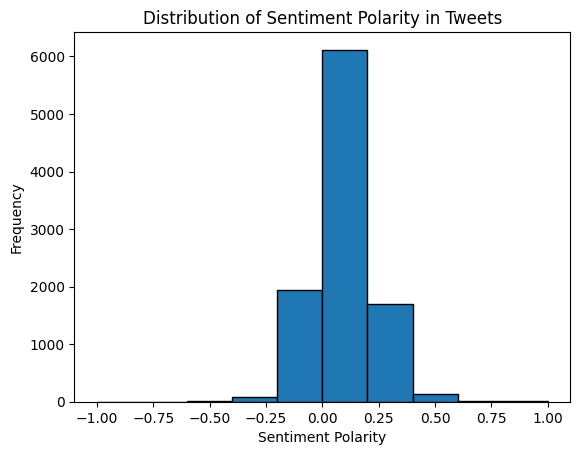

In [41]:

# Plotting sentiment polarity distribution
plt.hist(data['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()

# 🍕 Piechart

**Sentiment Analysis and Categorization**  
1. **Sentiment Calculation**:  
   - Uses `TextBlob` to compute the **polarity** of each tweet in the `Text` column and stores it in the `Sentiment` column.  
   - The polarity value ranges from **-1** (negative sentiment) to **1** (positive sentiment).

2. **Sentiment Categorization**:  
   - Categorizes each tweet based on its sentiment polarity:
     - **Positive**: If polarity > 0.
     - **Negative**: If polarity < 0.
     - **Neutral**: If polarity == 0.
   - The result is stored in the `Sentiment Category` column.

3. **Sentiment Count Calculation**:  
   - Calculates the count of each sentiment category (Positive, Negative, Neutral) using `value_counts()`.

4. **Pie Chart Visualization**:  
   - A pie chart is created to visualize the proportion of each sentiment category.  
   - **`autopct='%1.1f%%'`**: Displays percentages on the pie chart.  
   - **`startangle=90`**: Rotates the chart for better visibility.  
   - **`plt.axis('equal')`**: Ensures the pie chart is circular.  
   - The chart is displayed with the title "Sentiment Distribution".



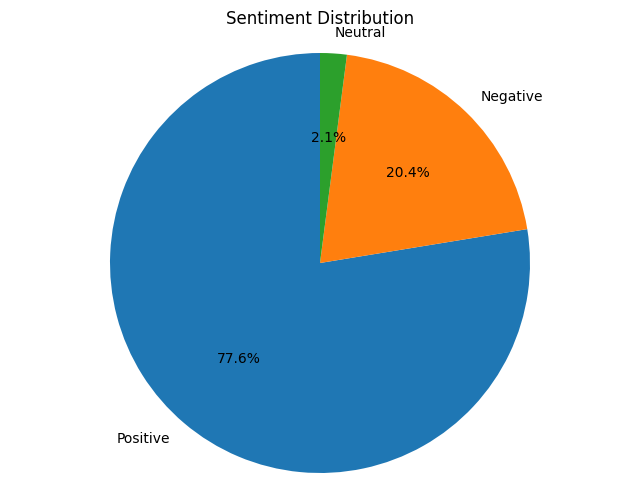

In [42]:
# Perform sentiment analysis on tweet text
data['Sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
data['Sentiment Category'] = data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculate the count of each sentiment category
sentiment_counts = data['Sentiment Category'].value_counts()

# Plot a pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

# All other plots to understand through the analysis


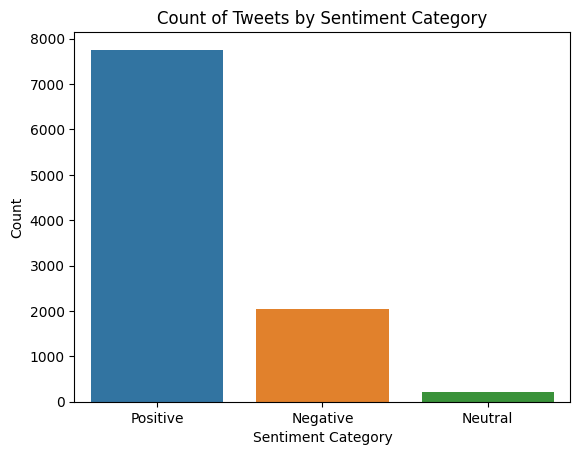

In [43]:
# Count plot
# Plot the count of tweets by sentiment category
sns.countplot(x='Sentiment Category', data=data)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()


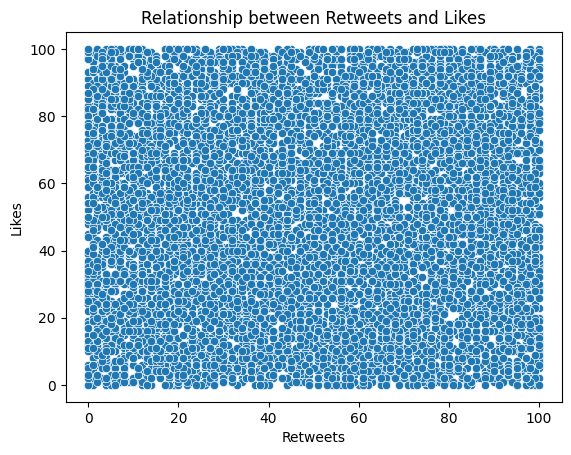

In [44]:
# scatterplot
# Plot the relationship between retweets and likes
sns.scatterplot(x='Retweets', y='Likes', data=data)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Relationship between Retweets and Likes')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


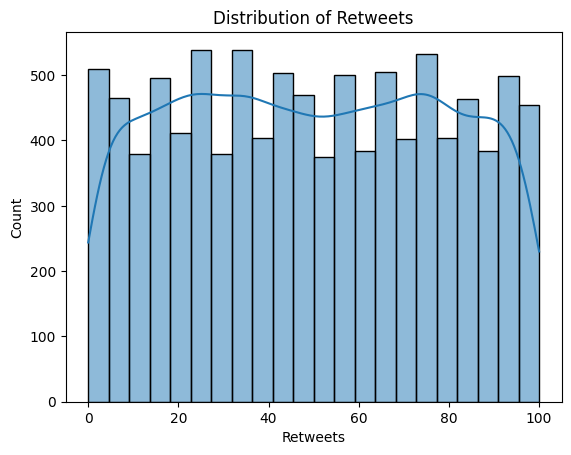

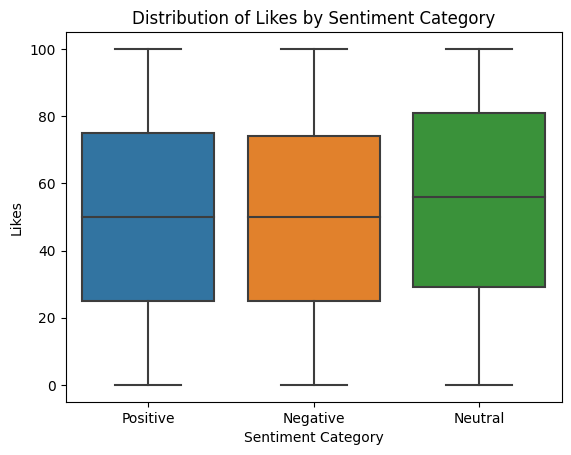

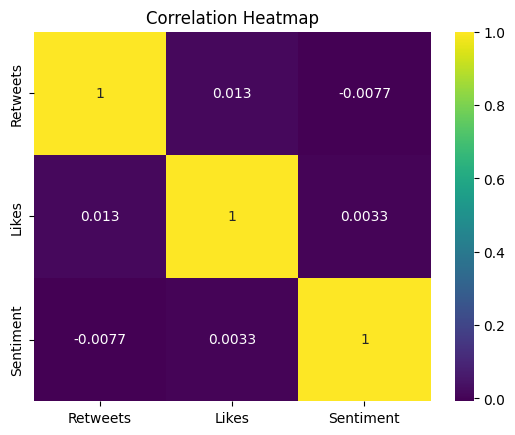

In [45]:
# Plot the distribution of retweets using a histogram with a kernel density estimate (KDE)
sns.histplot(data['Retweets'], kde=True)
plt.xlabel('Retweets')  # Label the x-axis as 'Retweets'
plt.ylabel('Count')     # Label the y-axis as 'Count'
plt.title('Distribution of Retweets')  # Set the plot title
plt.show()  # Display the plot

# Plot the distribution of likes across different sentiment categories using a boxplot
sns.boxplot(x='Sentiment Category', y='Likes', data=data)
plt.xlabel('Sentiment Category')  # Label the x-axis as 'Sentiment Category'
plt.ylabel('Likes')              # Label the y-axis as 'Likes'
plt.title('Distribution of Likes by Sentiment Category')  # Set the plot title
plt.show()  # Display the plot

# Calculate the correlation matrix for Retweets, Likes, and Sentiment
correlation_matrix = data[['Retweets', 'Likes', 'Sentiment']].corr()

# Plot a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')  # annot=True to display the correlation values
plt.title('Correlation Heatmap')  # Set the plot title
plt.show()  # Display the plot


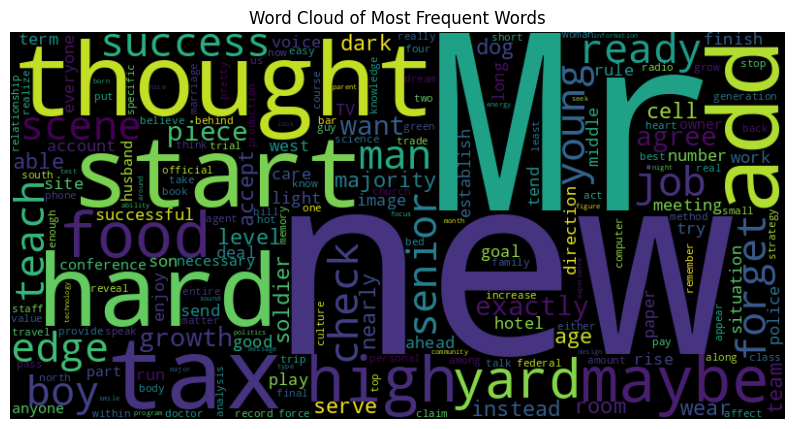

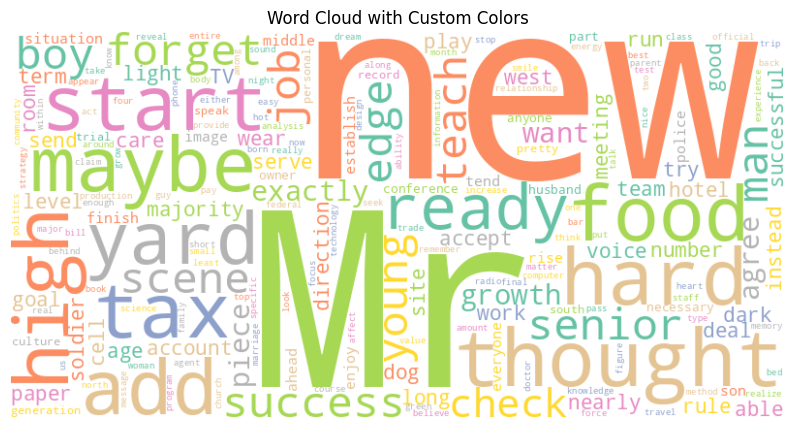

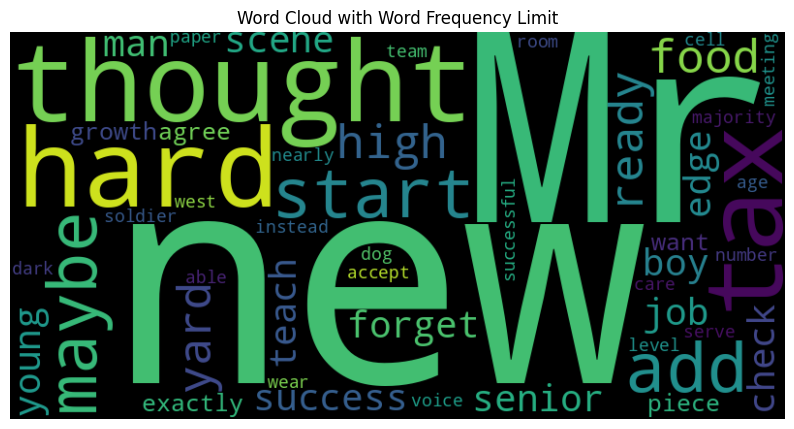

In [46]:
# Combine all tweet texts into a single string
all_text = ' '.join(data['Text'])

# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Generate a word cloud with custom colors
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Custom Colors')
plt.show()

# Load a custom image mask
mask = np.array(Image.open('/kaggle/input/twitter-dataset/download.jpg'))

# Generate a masked word cloud
wordcloud = WordCloud(width=800, height=400, mask=mask, contour_color='steelblue').generate(all_text)

# Set a word frequency limit
wordcloud = WordCloud(width=800, height=400, max_words=50).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Word Frequency Limit')
plt.show()


In [47]:
data.to_csv('twitter_dataset_final. csv', index=False)